In [ ]:
import pandas as pd 
import numpy as np 

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seg_test.zip to seg_test.zip


In [ ]:
import os                                                                         
import zipfile                                                                  

local_zip = '/content/seg_test.zip'                                      
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         
zip_ref.extractall('/content/')                                                  
zip_ref.close()                                                                  

In [ ]:
import os                                                                        
fold_bangunan = os.path.join('/content/seg_test/buildings')               
fold_hutan = os.path.join('/content/seg_test/forest')                        
fold_es = os.path.join('/content/seg_test/glacier')                    
fold_laut = os.path.join('/content/seg_test/sea')                    

print('Jumlah total gambar bangunan:', len(os.listdir(fold_bangunan)))             
print('Jumlah total gambar hutan:', len(os.listdir(fold_hutan)))                  
print('Jumlah total gambar es:', len(os.listdir(fold_es)))                
print('Jumlah total gambar laut:', len(os.listdir(fold_laut)))               

print("Menampilkan nama file gambar:")                                     
file_bangunan = os.listdir(fold_bangunan)                                         
print("bangunan:",file_bangunan[:5])                                             

file_hutan = os.listdir(fold_hutan)                                                
print("hutan:",file_hutan[:5])                                                     

file_es = os.listdir(fold_es)                                             
print("es:",file_es[:5])                                                  

file_laut = os.listdir(fold_laut)                                           
print("laut:",file_laut[:5])                                                  

Jumlah total gambar bangunan: 437
Jumlah total gambar hutan: 474
Jumlah total gambar es: 553
Jumlah total gambar laut: 510
Menampilkan nama file gambar:
bangunan: ['20646.jpg', '23652.jpg', '20587.jpg', '22257.jpg', '20074.jpg']
hutan: ['20311.jpg', '20686.jpg', '21965.jpg', '20166.jpg', '23207.jpg']
es: ['23221.jpg', '22855.jpg', '22054.jpg', '21452.jpg', '20868.jpg']
laut: ['23162.jpg', '24000.jpg', '21609.jpg', '23841.jpg', '23466.jpg']


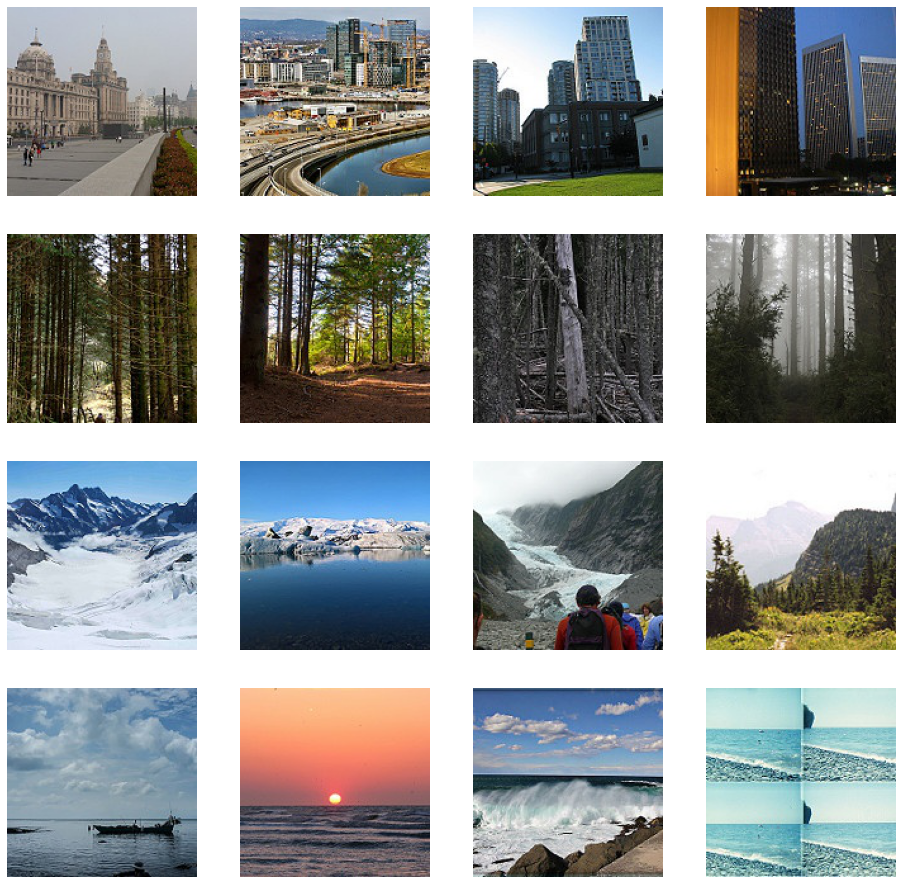

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 4                                                                           #Jumlah baris tampilan gambar
ncols = 4                                                                           #Jumlah baris tampilan gambar

pic_index = 0                                                                        #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)                                           #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_bangunan  = [os.path.join(fold_bangunan, fname)                              #Menampilkan gambar gunting
                      for fname in file_bangunan[pic_index-4:pic_index]]
gbr_tampil_hutan     = [os.path.join(fold_hutan, fname)                               #Menampilkan gambar batu
                      for fname in file_hutan[pic_index-4:pic_index]]
gbr_tampil_es   = [os.path.join(fold_es, fname)                             #Menampilkan gambar kertas
                      for fname in file_es[pic_index-4:pic_index]]
gbr_tampil_laut   = [os.path.join(fold_laut, fname)                             #Menampilkan gambar kertas
                      for fname in file_laut[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_bangunan+gbr_tampil_hutan+gbr_tampil_es+gbr_tampil_laut):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow 
import keras_preprocessing                                                        #Mengimpor modul keras 
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar  
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

# Split data

In [ ]:
BASIS_DIR = "/content/seg_test/"                                                                 #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                                           #Image generator
      rescale = 1./255,                                                                          #Menormalisasi data
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AUGMENTASI<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
	    rotation_range=40,                                                                         #Menerapkan skenario rotasi gambar hingga 40 derajat          
      width_shift_range=0.2,                                                                     #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.2,                                                                    #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.2,                                                                           #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli 
      zoom_range=0.2,                                                                            #Menerapkan skenario zoom gambar hingga sebesar 0.2 
      horizontal_flip=True,                                                                      #Menerapkan skenario putar balik gambar secara horizontal 
      fill_mode='nearest',                                                                       #Mengisi piksel yang kosong dengan nilai piksel terdekat 
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI<<<<<<<<<<<<<<<<      
      validation_split=0.2                                                                       #80% Data Training, 20% Data Validasi
      )

# Membuat train generator

In [ ]:
train_generator = training_datagen.flow_from_directory(                                      #Generator data training
	BASIS_DIR,                                                                                 #Folder target untuk digenerasi
	target_size=(150,150),                                                                     #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                                  #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,                                                                   
  subset='training'                                                                          #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                                 #Generator data validasi
	BASIS_DIR,                                                                                 #Folder target untuk digenerasi
	target_size=(150,150),                                                                     #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                                  #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                                        #Untuk data validasi
  )

Found 1581 images belonging to 4 classes.
Found 393 images belonging to 4 classes.


Membuat Model

In [ ]:
model = tf.keras.models.Sequential([                                                  #Membentuk model sequential
                                                                                      #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),  #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                        #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                   #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                   #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(4, activation='softmax')                                   #Layer output
])

model.summary()                                                                      #Menampilkan summary model
Model: "sequential_2"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

# Melalukan training pada dataset dengan menggunakan callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MELATIH MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4, 
    verbose=2,
    callbacks=[callbacks]
    )

Epoch 1/100
16/16 - 14s - loss: 1.2846 - accuracy: 0.3672 - val_loss: 2.6983 - val_accuracy: 0.2422
Epoch 2/100
16/16 - 12s - loss: 1.2453 - accuracy: 0.4238 - val_loss: 1.0537 - val_accuracy: 0.5000
Epoch 3/100
16/16 - 12s - loss: 1.0267 - accuracy: 0.5371 - val_loss: 0.8848 - val_accuracy: 0.6562
Epoch 4/100
16/16 - 12s - loss: 1.0189 - accuracy: 0.5172 - val_loss: 0.8157 - val_accuracy: 0.6172
Epoch 5/100
16/16 - 12s - loss: 0.9645 - accuracy: 0.5508 - val_loss: 1.3375 - val_accuracy: 0.4531
Epoch 6/100
16/16 - 12s - loss: 0.9449 - accuracy: 0.5538 - val_loss: 0.9054 - val_accuracy: 0.5859
Epoch 7/100
16/16 - 12s - loss: 0.9477 - accuracy: 0.5923 - val_loss: 0.8364 - val_accuracy: 0.6250
Epoch 8/100
16/16 - 12s - loss: 0.9241 - accuracy: 0.5639 - val_loss: 0.7700 - val_accuracy: 0.6328
Epoch 9/100
16/16 - 12s - loss: 0.9182 - accuracy: 0.6105 - val_loss: 0.9765 - val_accuracy: 0.5234
Epoch 10/100
16/16 - 12s - loss: 0.8490 - accuracy: 0.6289 - val_loss: 0.7256 - val_accuracy: 0.7031

# Viasualisasi data dengan Matplotlib

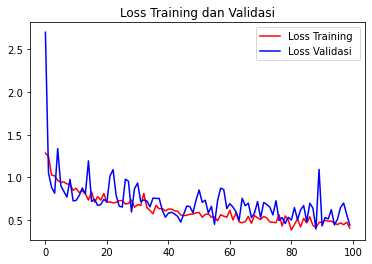

<Figure size 432x288 with 0 Axes>

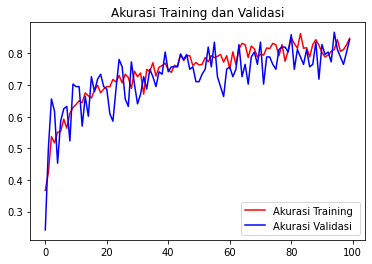

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))  

plt.plot(epochs, loss, 'r', label='Loss Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')                          #Plot nilai akurasi validasi
plt.title('Loss Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()                                                        #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

# Mengetes dengan cara menunjukkan gambar random

Saving 51.jpg to 51.jpg
51.jpg
Tangan Ini Menunjukkan bentuk ES


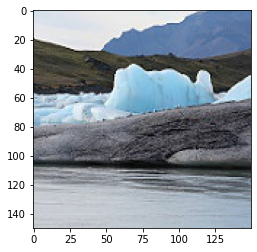

In [ ]:
import numpy as np                                                                                                        #Mengimpor modul numpy
from google.colab import files                                                                                            #Mengimpor modul import file
from keras.preprocessing import image                                                                                     #Mengimpor modul keras_preprocessing untuk gambar

uploaded = files.upload()                                                                                                 #Mengunggah gambar yang akan dikenali model

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                                                                      #Mengubah ukuran gambar menjadi 150x150 piksel
  imgplot = plt.imshow(img)                                                                                               #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Gambar Ini Menunjukkan bentuk BANGUNAN')                                                                         #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk HUTAN')                                                                           #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
  elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk ES')
  elif classes[0][3]==1:
    print('Tangan Ini Menunjukkan bentuk LAUT')                                                                          #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  else:
    print('Tidak Diketahui')                                                                                              #Jika gambar yang diunggah selain gambar tangan yang diinginkan, tampilkan "Tidak Diketahui"

# Mengkonversi model menggunakan TFLiteConverter.

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmprzr5l3mq/assets


# Menyimpan model dalam format .tflite.

In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)